# MA506 Probability and Statistical Inference
# Lec 25: Multiclass probabilistic classification

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Multinomial logistic Regression

Recalling, for a 2 class problem, assuming class labels are 0 and 1, the probability of class 1 was quantified by the sigmoid function:

$$
P(y = 1|x) = h(x) = \frac{1}{1+e^{-X\beta}}
$$

Now in a multiclass problem, instead of class label $\{0,1\}$ assuming we have $K$ class labels. Hence y can take $K$ possible values:
$$
y = \{1,2,...,K\}
$$

For this case multinomial logistic regression assigns each class its own $\beta_i$ vector. Hence:

$$
P(y = i|x) = \frac{e^{X\beta_i}}{\sum_{j=1}^K e^{X \beta_j}}
$$




**For example, for a 3 class problem, the procedure can be summarized as follows**:

1. Fit 3 logistic regression models
    - For class 1 vs all other classes (obtain weight $\beta_1$)
    - For class 2 vs all other classes (obtain weight $\beta_2$)
    - For class 3 vs all other classes (obtain weight $\beta_3$)
2. During prediction of class for a new sample x, compute:

$$
P(y = 1) = \frac{e^{X \beta_1}}{e^{X \beta_1} + e^{X \beta_2} + e^{X \beta_3}}
$$

$$
P(y = 2) = \frac{e^{X \beta_2}}{e^{X \beta_1} + e^{X \beta_2} + e^{X \beta_3}}
$$

$$
P(y = 3) = \frac{e^{X \beta_3}}{e^{X \beta_1} + e^{X \beta_2} + e^{X \beta_3}}
$$

3. Final class prediction is the class with highest probability:

$$
i = \arg\max_i P(y = i)
$$


## Datasets we will use

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()
X = digits.data
y = digits.target

In [14]:
def plot_digits(X,y):
    index = np.random.randint(X.shape[0])
    sample = X[index,:]
    label = y[index]
    plt.imshow(sample.reshape(8,8),cmap = 'gray')
    plt.title(f'Digit: {label}',size =15)
    plt.show()

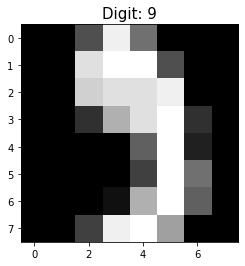

In [19]:
plot_digits(X,y)

## Dividing data into training and testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)